In [ ]:
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.listdir()

['.config', 'drive', 'sample_data']

In [ ]:
import numpy as np
data=np.load('drive/My Drive/images2.npy', allow_pickle=True)

In [ ]:
labels=np.load('/content/drive/MyDrive/labels2.npy',allow_pickle=True)

In [ ]:
data.shape

(766, 512, 512)

In [ ]:
data[0].flatten()

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [ ]:
data=np.asarray(data)
labels=np.asarray(labels)

In [ ]:
import matplotlib.pyplot as plt

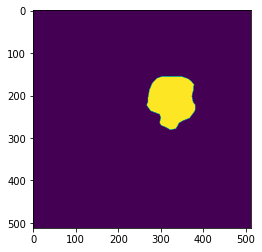

In [ ]:
plt.imshow(data[0])

In [ ]:
l=[]
for i in range(766):
  l.append(data[i].flatten())


In [ ]:
data=data.flatten()

In [ ]:
data.shape

(200802304,)

In [ ]:
data[0].flatten()

array([0], dtype=uint8)

In [ ]:
data[0]

0

In [ ]:
data[0].flatten().shape

(1,)

In [ ]:
l=np.asarray(l)

In [ ]:
l.shape

(766, 262144)

In [ ]:
d=[]
for i in range(766):
  d.append(l[i][:261075])
  d[i]=d[i].reshape((295,295,3))


In [ ]:
l[0].shape

(262144,)

In [ ]:
l[0][:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [ ]:
d=np.asarray(d)

In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
for i in range(766):
  d[i]=preprocess_input(d[i])

In [ ]:
from keras import Sequential
#importing other required libraries
import numpy as np
import pandas as pd
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras import Sequential
from keras.applications import VGG19, VGG16, ResNet50
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD,Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten, Dense, BatchNormalization, Activation,Dropout
from keras.utils import to_categorical
import tensorflow as tf
import random

In [ ]:
a=tf.keras.utils.to_categorical(labels, num_classes=4)

In [ ]:
a.shape

(766, 4)

In [ ]:
a=np.delete(a, 0, 1)

In [ ]:
(x_train, x_val, trainY, testY) = train_test_split(d,a,test_size=0.20, random_state=42)

In [ ]:
from keras.layers import AveragePooling2D

In [ ]:

from keras.layers import Input


In [ ]:

from keras.applications import VGG19, VGG16, ResNet50
from keras.models import Model
from keras.layers import Input
from keras.layers import AveragePooling2D
baseModel = ResNet50(weights="imagenet", include_top=False,input_tensor=Input(shape=(295,295, 3)))
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(3, activation="softmax")(headModel)
model = Model(inputs=baseModel.input, outputs=headModel)
for layer in baseModel.layers:
	layer.trainable = False

94773248/94765736 [==============================] - 3s 0us/step


In [ ]:
INIT_LR = 1e-4
EPOCHS =10
BS = 32
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])

In [ ]:
H = model.fit(x_train, trainY, batch_size=11,steps_per_epoch=len(x_train)//11,validation_data=(x_val, testY),validation_steps=len(x_val)//11 ,epochs=30)

Epoch 1/30
55/55 [==============================] - 205s 4s/step - loss: 0.2312 - accuracy: 0.9157 - val_loss: 0.2095 - val_accuracy: 0.9156
Epoch 2/30
55/55 [==============================] - 205s 4s/step - loss: 0.2256 - accuracy: 0.9201 - val_loss: 0.2031 - val_accuracy: 0.9156
Epoch 3/30
55/55 [==============================] - 205s 4s/step - loss: 0.2077 - accuracy: 0.9218 - val_loss: 0.2030 - val_accuracy: 0.9156
Epoch 4/30
55/55 [==============================] - 204s 4s/step - loss: 0.2053 - accuracy: 0.9201 - val_loss: 0.2000 - val_accuracy: 0.9156
Epoch 5/30
55/55 [==============================] - 203s 4s/step - loss: 0.1947 - accuracy: 0.9218 - val_loss: 0.2010 - val_accuracy: 0.9156
Epoch 6/30
55/55 [==============================] - 203s 4s/step - loss: 0.1915 - accuracy: 0.9251 - val_loss: 0.1987 - val_accuracy: 0.9156
Epoch 7/30
55/55 [==============================] - 204s 4s/step - loss: 0.2097 - accuracy: 0.9151 - val_loss: 0.1978 - val_accuracy: 0.9156
Epoch 8/30
55